##**Prediction of Migraine**

**Importing libraries**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')


**Data Preprocessing**

In [13]:
df = pd.read_csv('migraine_data.csv')
df.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,31.7050,12.139043,15.0,22.0,28.0,40.0,77.0
Duration,400.0,1.6100,0.770964,1.0,1.0,1.0,2.0,3.0
Frequency,400.0,2.3650,1.675947,1.0,1.0,2.0,4.0,8.0
Location,400.0,0.9725,0.268186,0.0,1.0,1.0,1.0,2.0
Character,400.0,0.9775,0.277825,0.0,1.0,1.0,1.0,2.0
Intensity,400.0,2.4700,0.768490,0.0,2.0,3.0,3.0,3.0
Nausea,400.0,0.9875,0.111242,0.0,1.0,1.0,1.0,1.0
Vomit,400.0,0.3225,0.468019,0.0,0.0,0.0,1.0,1.0
Phonophobia,400.0,0.9775,0.148489,0.0,1.0,1.0,1.0,1.0
Photophobia,400.0,0.9800,0.140175,0.0,1.0,1.0,1.0,1.0


In [ ]:
df.median()

Age            28.0
Duration        1.0
Frequency       2.0
Location        1.0
Character       1.0
Intensity       3.0
Nausea          1.0
Vomit           0.0
Phonophobia     1.0
Photophobia     1.0
Visual          2.0
Sensory         0.0
Dysphasia       0.0
Dysarthria      0.0
Vertigo         0.0
Tinnitus        0.0
Hypoacusis      0.0
Diplopia        0.0
Defect          0.0
Ataxia          0.0
Conscience      0.0
Paresthesia     0.0
DPF             0.0
dtype: float64

In [ ]:
df.skew()

Age             0.819051
Duration        0.798146
Frequency       0.968169
Location       -1.126193
Character      -0.812426
Intensity      -1.697076
Nausea         -8.808753
Vomit           0.762329
Phonophobia    -6.463788
Photophobia    -6.882981
Visual          0.034794
Sensory         1.857410
Dysphasia       4.887189
Dysarthria     20.000000
Vertigo         2.276332
Tinnitus        3.719431
Hypoacusis      8.010163
Diplopia       14.088736
Defect          8.010163
Ataxia          0.000000
Conscience      7.387124
Paresthesia    11.459712
DPF             0.367357
dtype: float64

In [ ]:
df.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [ ]:
df.columns.to_list()

['Age',
 'Duration',
 'Frequency',
 'Location',
 'Character',
 'Intensity',
 'Nausea',
 'Vomit',
 'Phonophobia',
 'Photophobia',
 'Visual',
 'Sensory',
 'Dysphasia',
 'Dysarthria',
 'Vertigo',
 'Tinnitus',
 'Hypoacusis',
 'Diplopia',
 'Defect',
 'Ataxia',
 'Conscience',
 'Paresthesia',
 'DPF',
 'Type']

In [ ]:
df.shape

(400, 24)

**Exploratory Data Analysis**

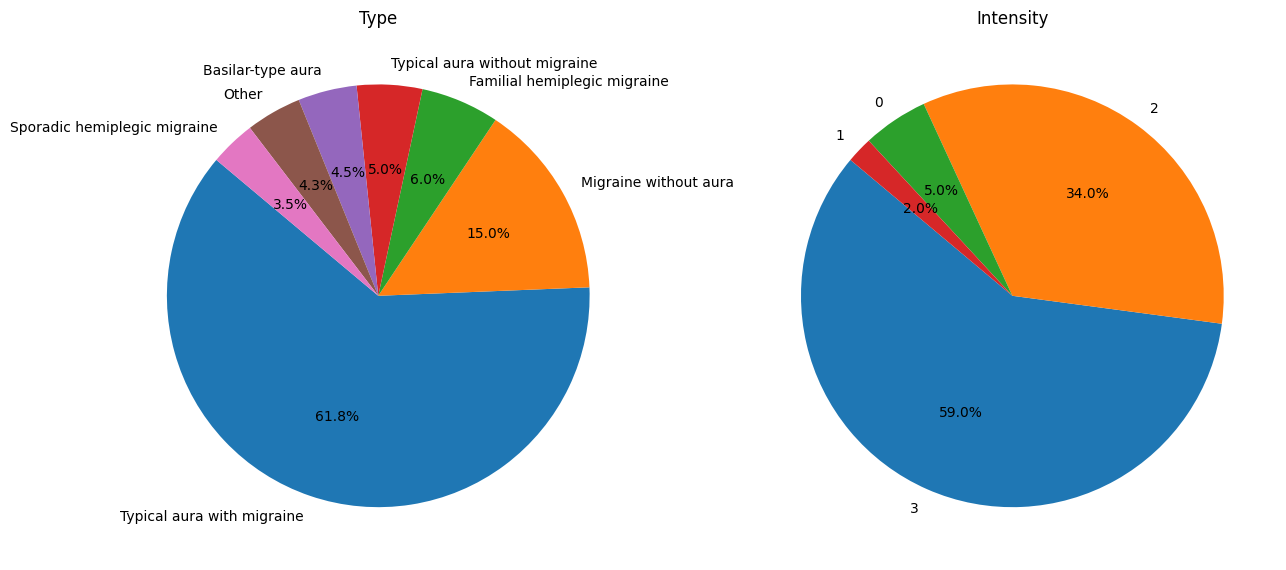

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Type')

ax[1].pie(df['Intensity'].value_counts(), labels=df['Intensity'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Intensity')

plt.show()

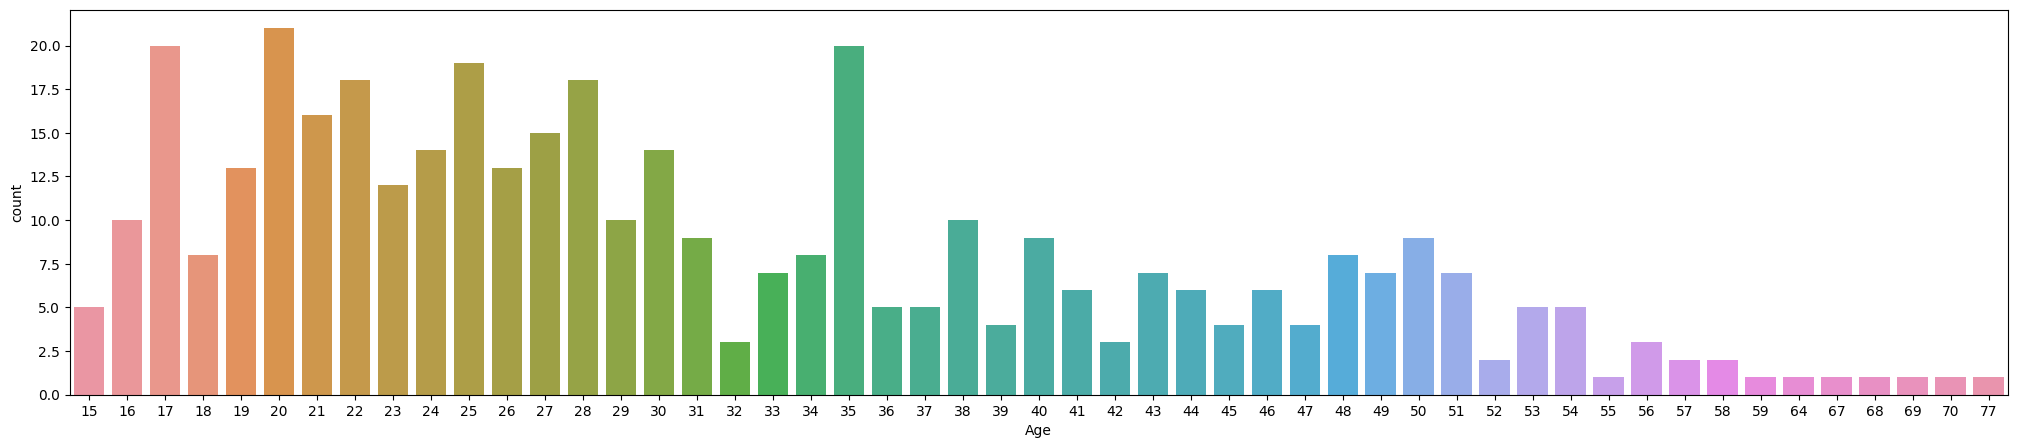

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(data = df , x = 'Age')
plt.show()

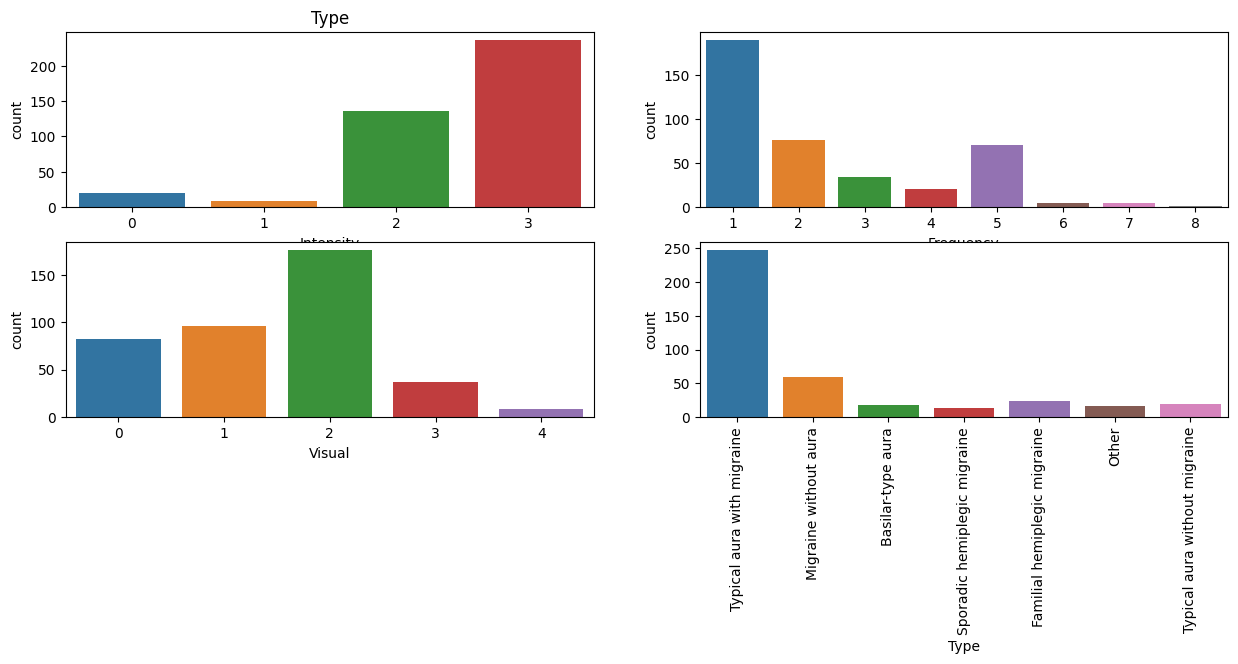

In [ ]:

fig, ax = plt.subplots(2, 2, figsize=(15, 5))

sns.countplot(data = df , x = 'Intensity',ax = ax[0,0])
sns.countplot(data = df , x = 'Frequency',ax = ax[0,1])
sns.countplot(data = df , x = 'Visual',ax = ax[1,0])
sns.countplot(data = df , x = 'Type',ax = ax[1,1])
ax[0, 0].set_title('Intensity')
ax[0, 0].set_title('Frequency')
ax[0, 0].set_title('Visual')
ax[0, 0].set_title('Type')

ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)

plt.show()


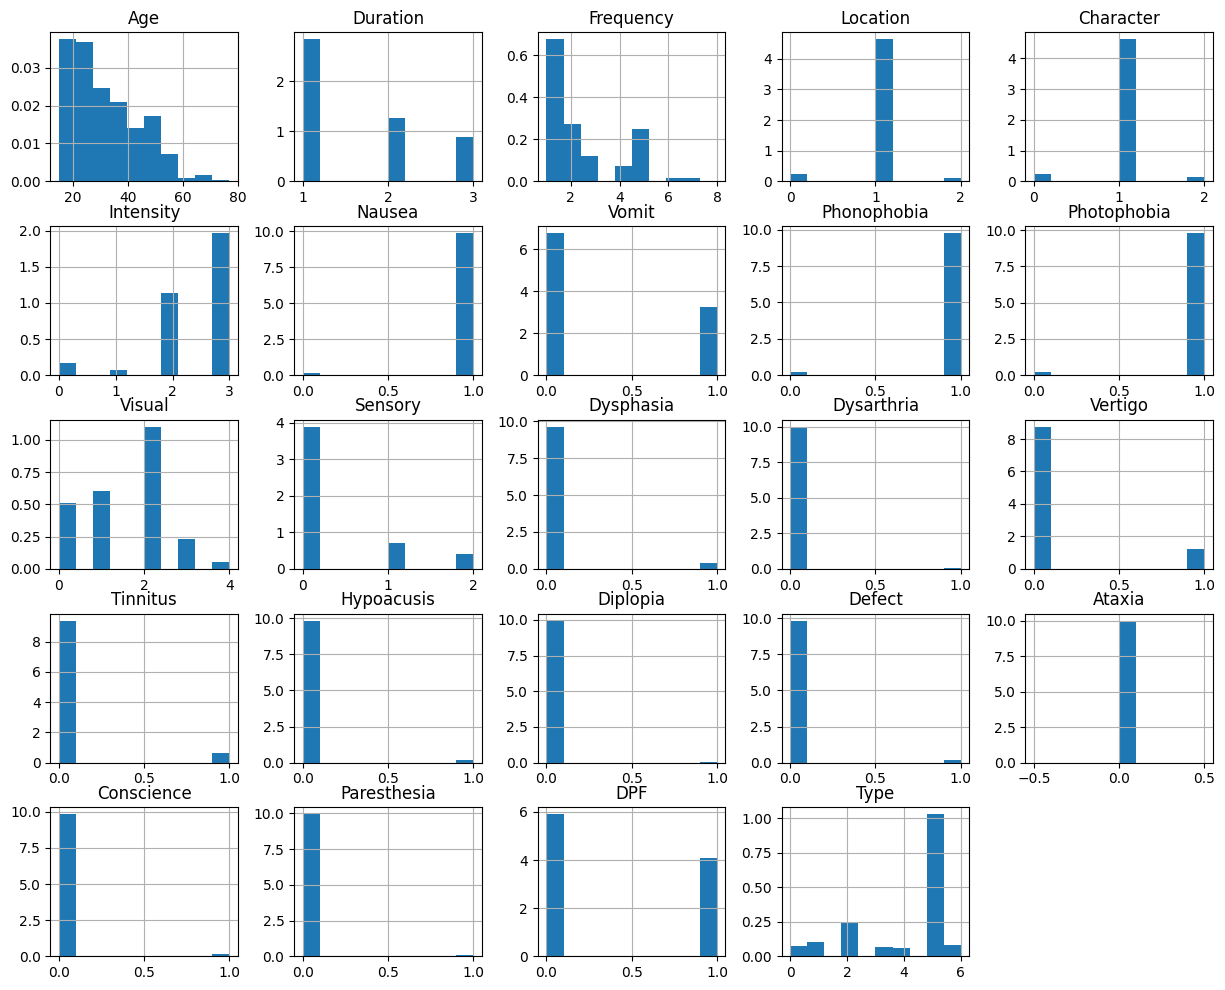

In [ ]:
df.hist(figsize=(15,12), density=True)
plt.show()

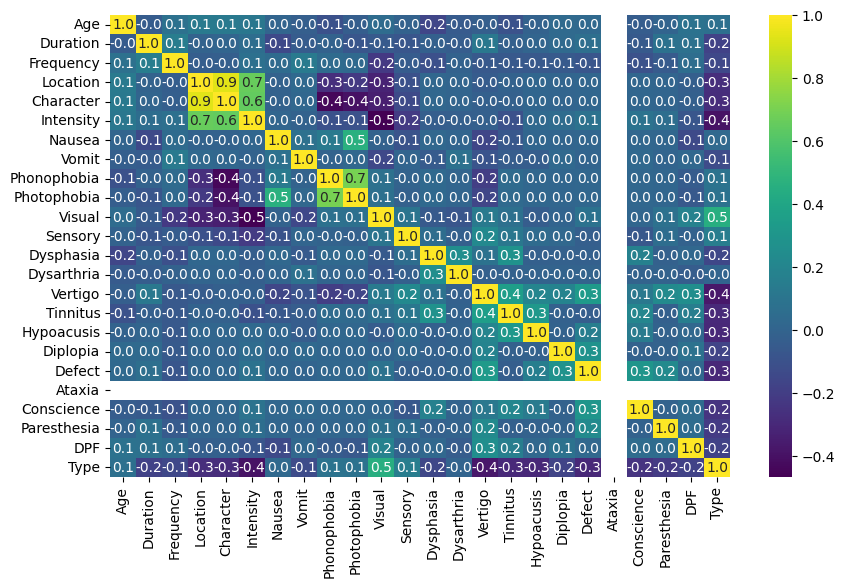

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='viridis')
plt.show()

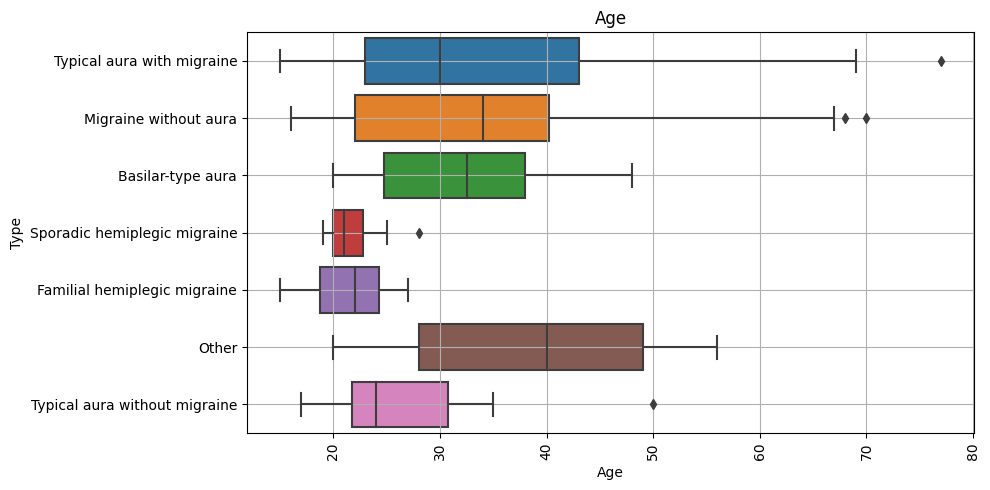

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Age', y='Type')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Type')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

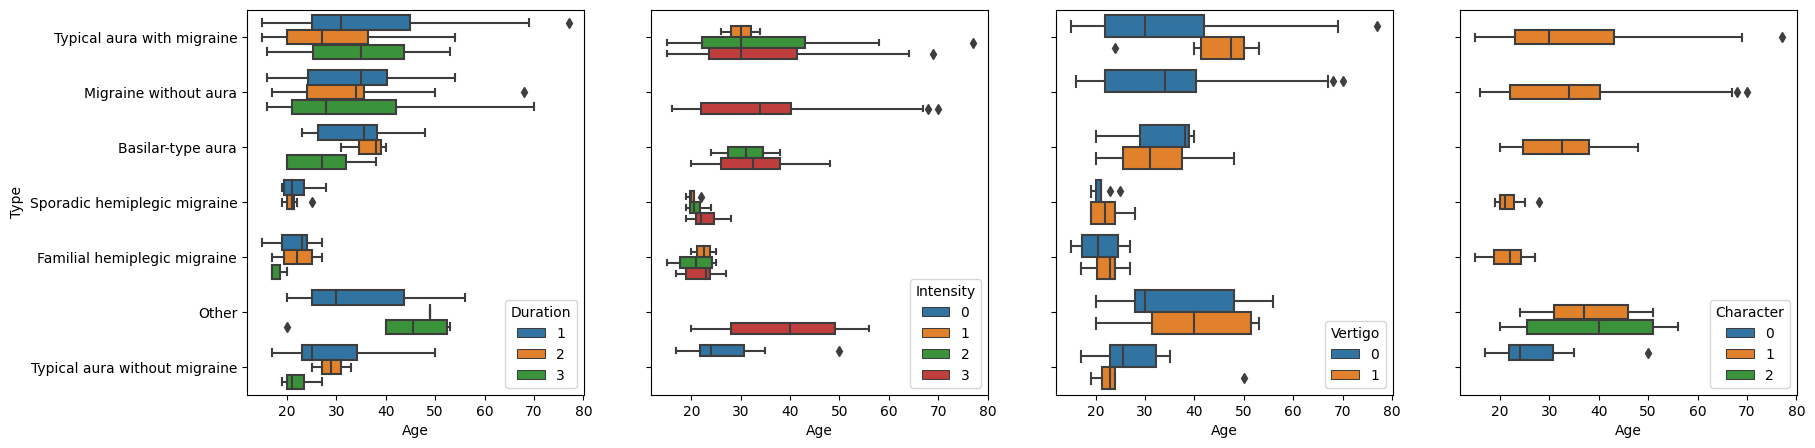

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(data=df, x='Age', y='Type', hue='Duration',ax = ax[0])
sns.boxplot(data=df, x='Age', y='Type', hue='Intensity',ax = ax[1])
sns.boxplot(data=df, x='Age', y='Type', hue='Vertigo',ax = ax[2])
sns.boxplot(data=df, x='Age', y='Type', hue='Character',ax = ax[3])

ax[1].set_yticklabels([])
ax[1].set_ylabel('')
ax[2].set_yticklabels([])
ax[2].set_ylabel('')
ax[3].set_yticklabels([])
ax[3].set_ylabel('')

plt.show()

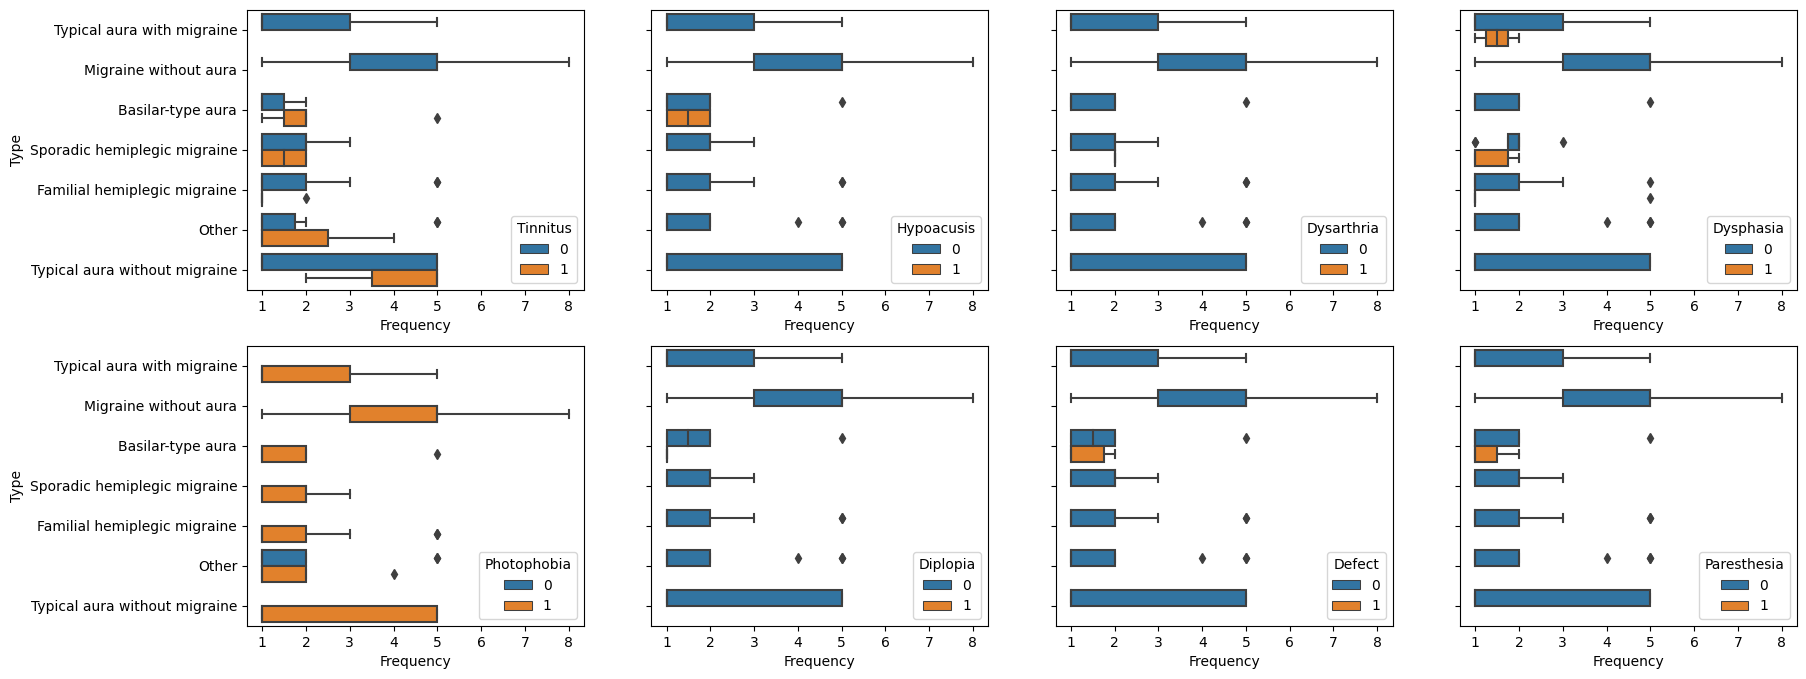

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))

sns.boxplot(data=df, x='Frequency', y='Type', hue='Tinnitus',ax = ax[0,0])
sns.boxplot(data=df, x='Frequency', y='Type', hue='Hypoacusis',ax = ax[0,1])
sns.boxplot(data=df, x='Frequency', y='Type', hue='Dysarthria',ax = ax[0,2])
sns.boxplot(data=df, x='Frequency', y='Type', hue='Dysphasia',ax = ax[0,3])

sns.boxplot(data=df, x='Frequency', y='Type', hue='Photophobia',ax = ax[1,0])
sns.boxplot(data=df, x='Frequency', y='Type', hue='Diplopia',ax = ax[1,1])
sns.boxplot(data=df, x='Frequency', y='Type', hue='Defect',ax = ax[1,2])
sns.boxplot(data=df, x='Frequency', y='Type', hue='Paresthesia',ax = ax[1,3])

ax[0,1].set_yticklabels([])
ax[0,1].set_ylabel('')
ax[0,2].set_yticklabels([])
ax[0,2].set_ylabel('')
ax[0,3].set_yticklabels([])
ax[0,3].set_ylabel('')

ax[1,1].set_yticklabels([])
ax[1,1].set_ylabel('')
ax[1,2].set_yticklabels([])
ax[1,2].set_ylabel('')
ax[1,3].set_yticklabels([])
ax[1,3].set_ylabel('')
plt.show()

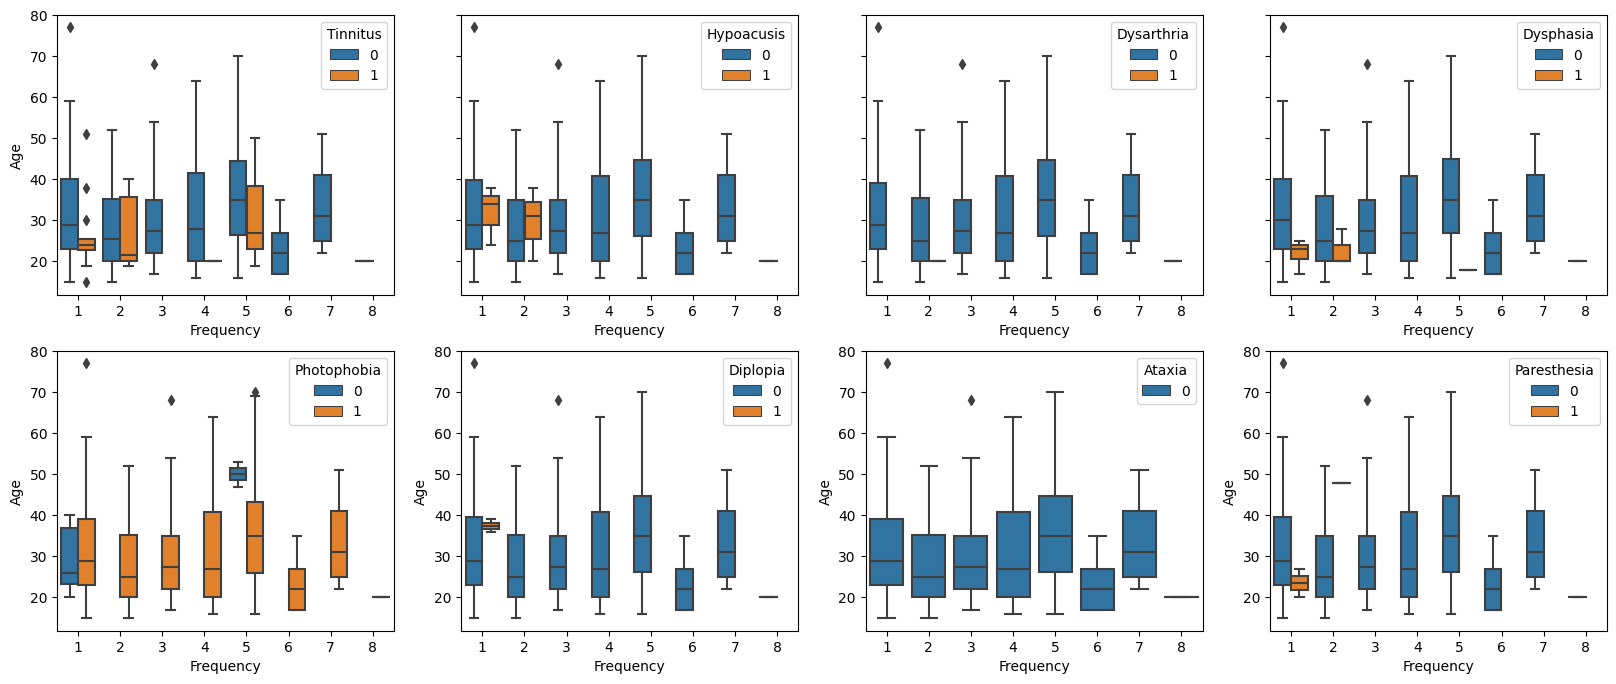

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))

sns.boxplot(data=df, x='Frequency', y='Age', hue='Tinnitus',ax = ax[0,0])
sns.boxplot(data=df, x='Frequency', y='Age', hue='Hypoacusis',ax = ax[0,1])
sns.boxplot(data=df, x='Frequency', y='Age', hue='Dysarthria',ax = ax[0,2])
sns.boxplot(data=df, x='Frequency', y='Age', hue='Dysphasia',ax = ax[0,3])

sns.boxplot(data=df, x='Frequency', y='Age', hue='Photophobia',ax = ax[1,0])
sns.boxplot(data=df, x='Frequency', y='Age', hue='Diplopia',ax = ax[1,1])
sns.boxplot(data=df, x='Frequency', y='Age', hue='Ataxia',ax = ax[1,2])
sns.boxplot(data=df, x='Frequency', y='Age', hue='Paresthesia',ax = ax[1,3])
ax[0,1].set_yticklabels([])
ax[0,1].set_ylabel('')
ax[0,2].set_yticklabels([])
ax[0,2].set_ylabel('')
ax[0,3].set_yticklabels([])
ax[0,3].set_ylabel('')

plt.show()

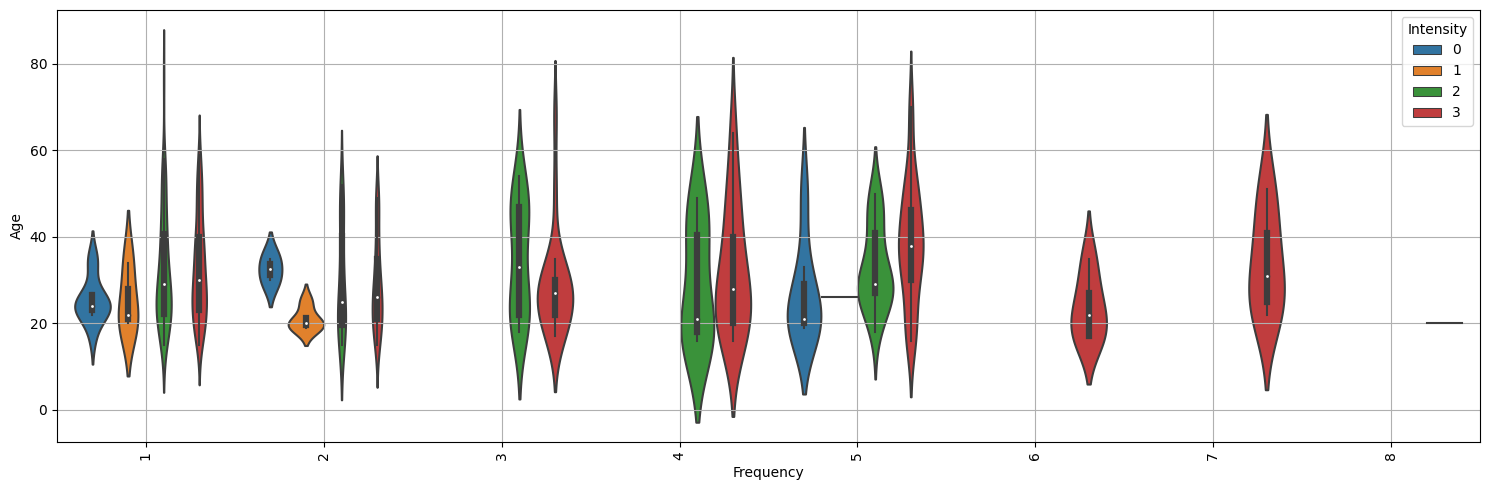

In [ ]:
plt.figure(figsize=(15, 5))

sns.violinplot(data=df, x='Frequency', y='Age', hue='Intensity')

plt.xlabel('Frequency')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

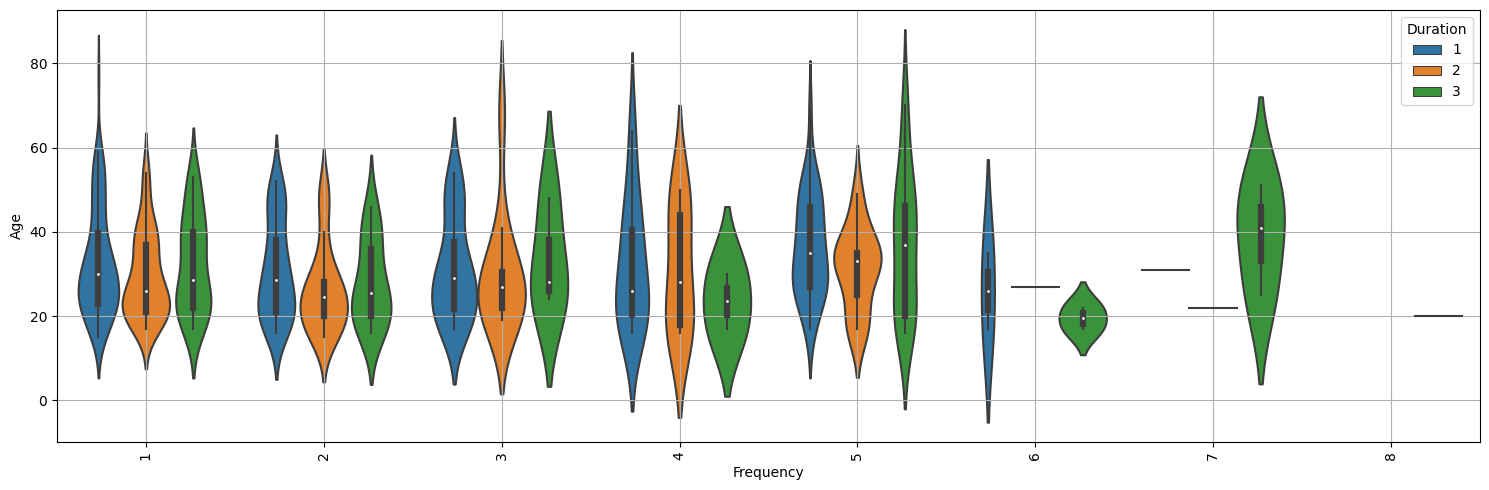

In [ ]:
plt.figure(figsize=(15, 5))

sns.violinplot(data=df, x='Frequency', y='Age', hue='Duration')

plt.xlabel('Frequency')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

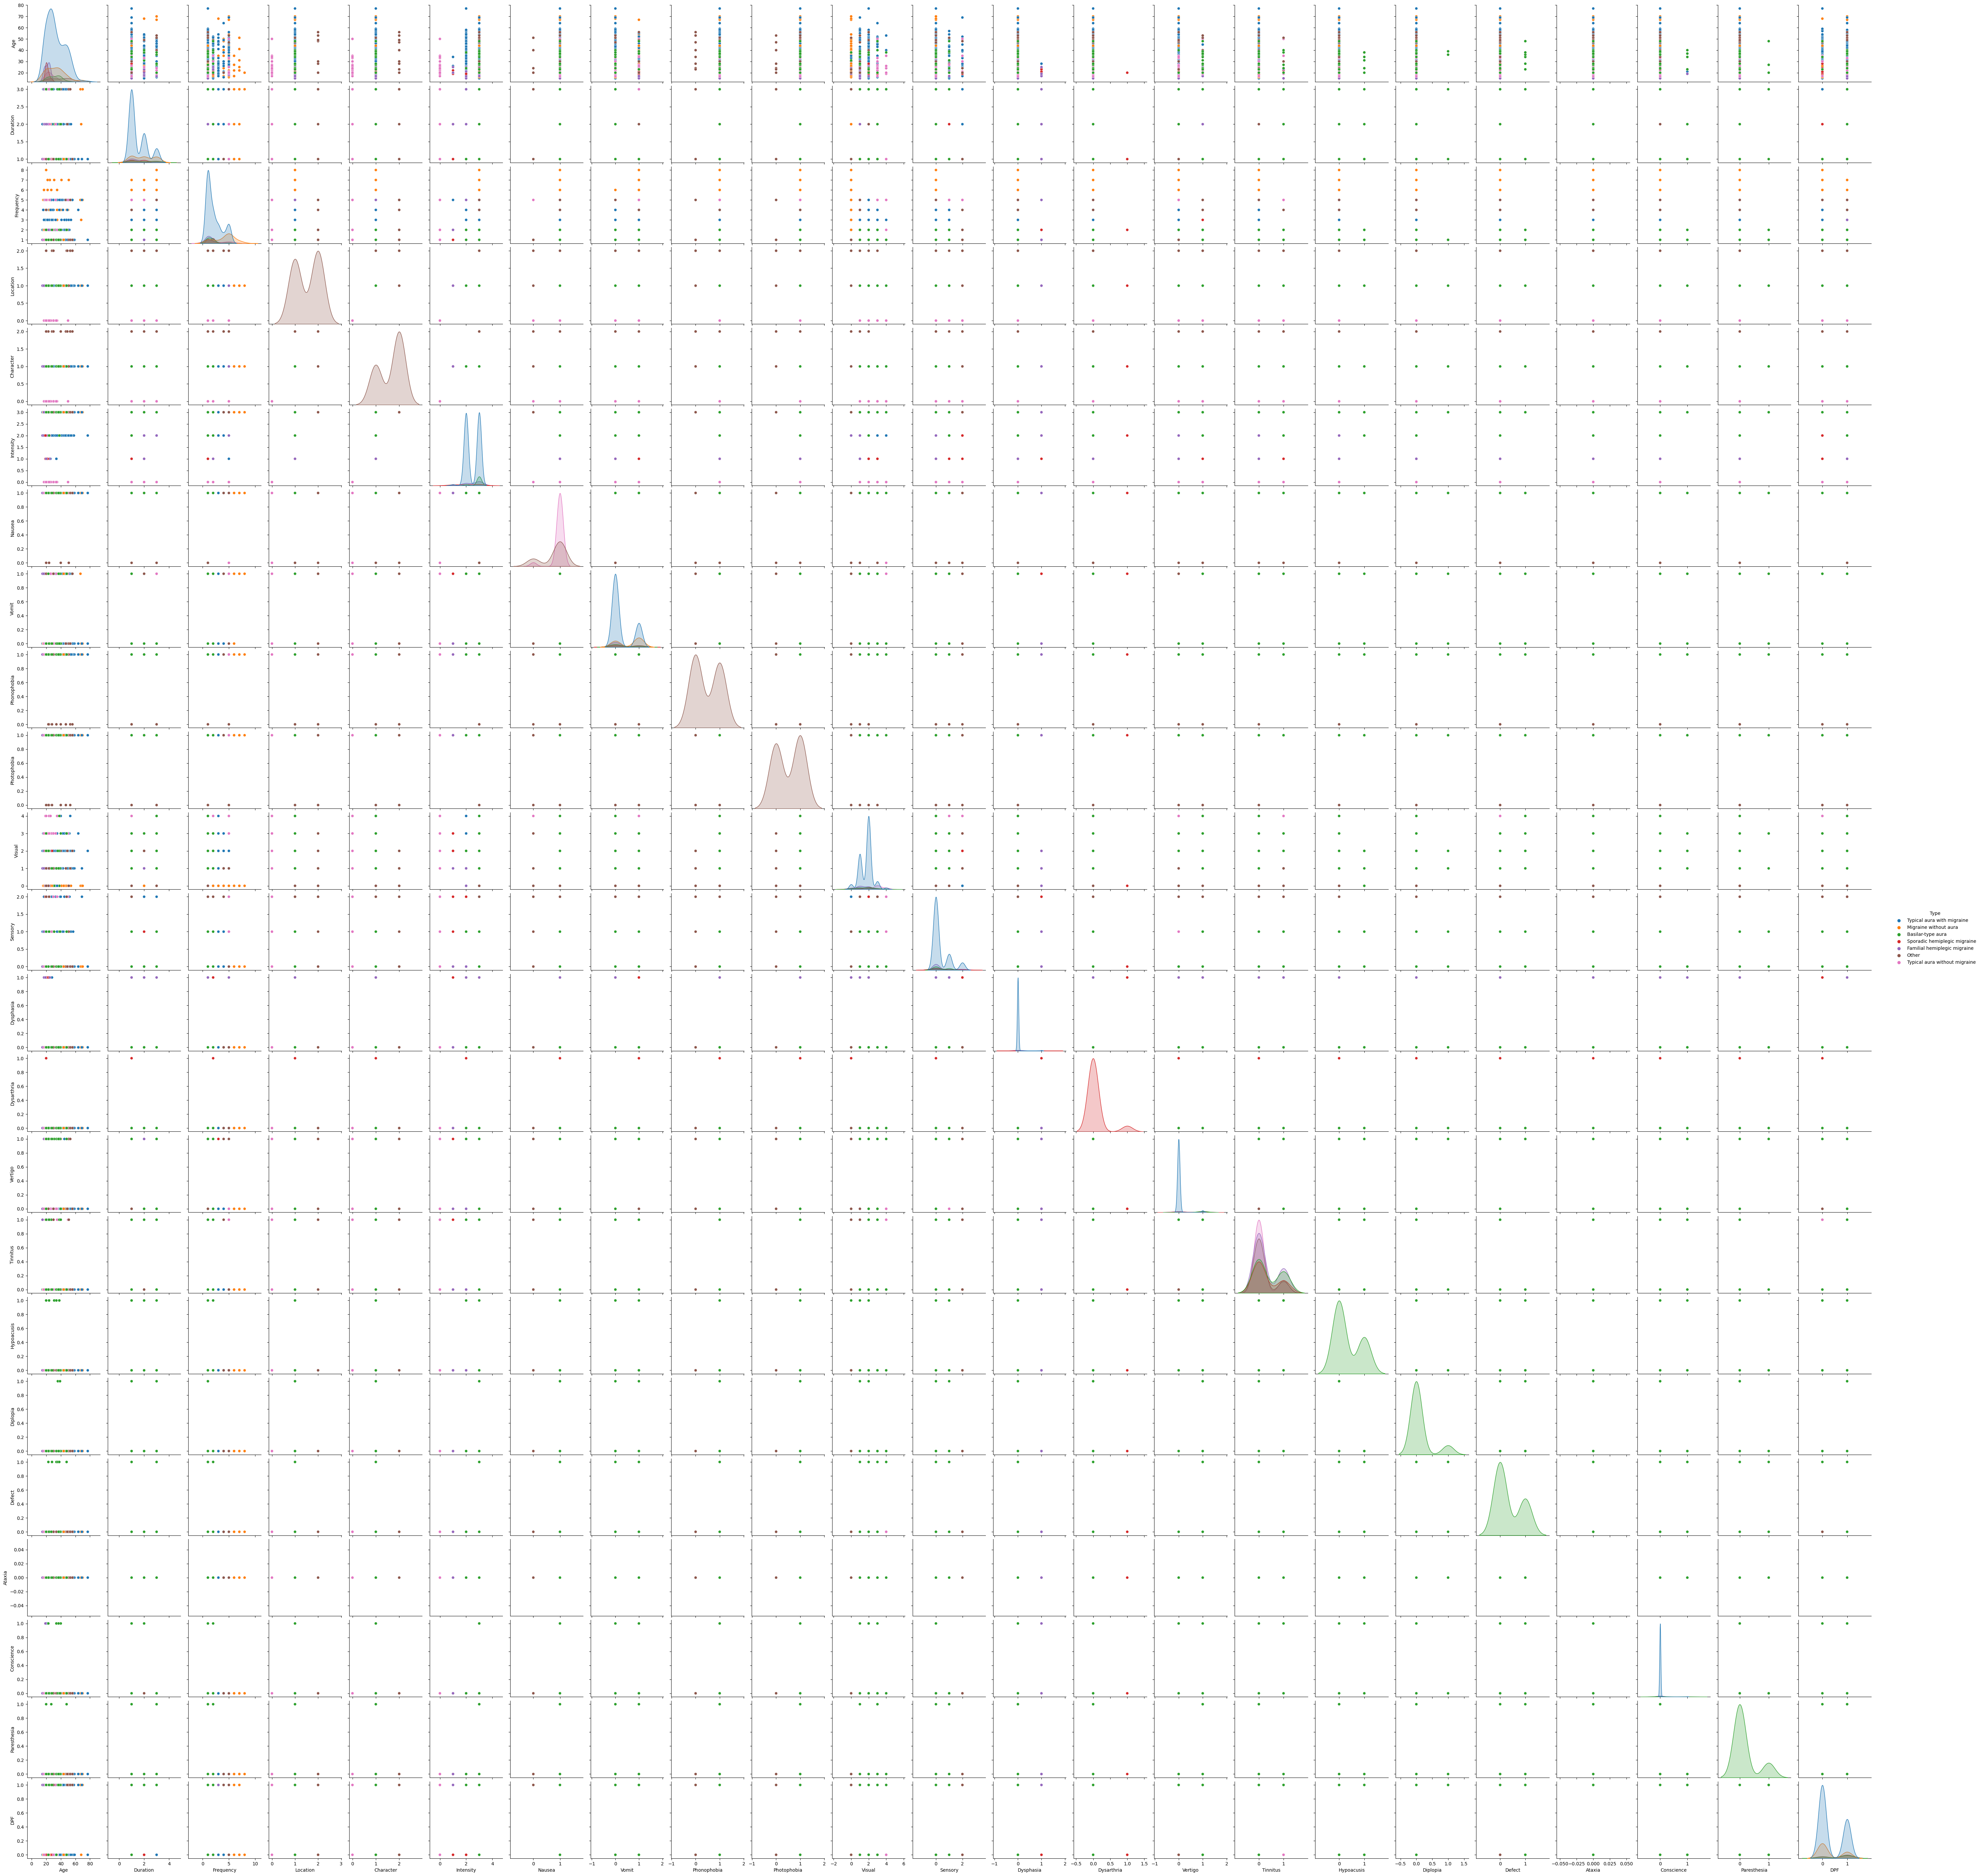

In [ ]:
sns.pairplot(data = df, hue='Type')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Type'] = lb.fit_transform(df['Type'])
df.head(1)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5


**Select Best Features**

In [15]:
X = df.drop(columns=['Type'])
y = df['Type']

f_scores, p_values = f_regression(X, y)

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores, 'P_Value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='F_Score', ascending=False)
feature_scores_df

,Feature,F_Score,P_Value
10,Visual,103.877096,7.898646e-22
5,Intensity,72.559188,3.376104e-16
14,Vertigo,63.180823,1.963962e-14
18,Defect,39.487416,8.674270e-10
16,Hypoacusis,39.487416,8.674270e-10
15,Tinnitus,38.197791,1.583474e-09
4,Character,33.305392,1.585884e-08
3,Location,32.916896,1.907089e-08
20,Conscience,25.193354,7.836620e-07
21,Paresthesia,18.661756,1.973554e-05


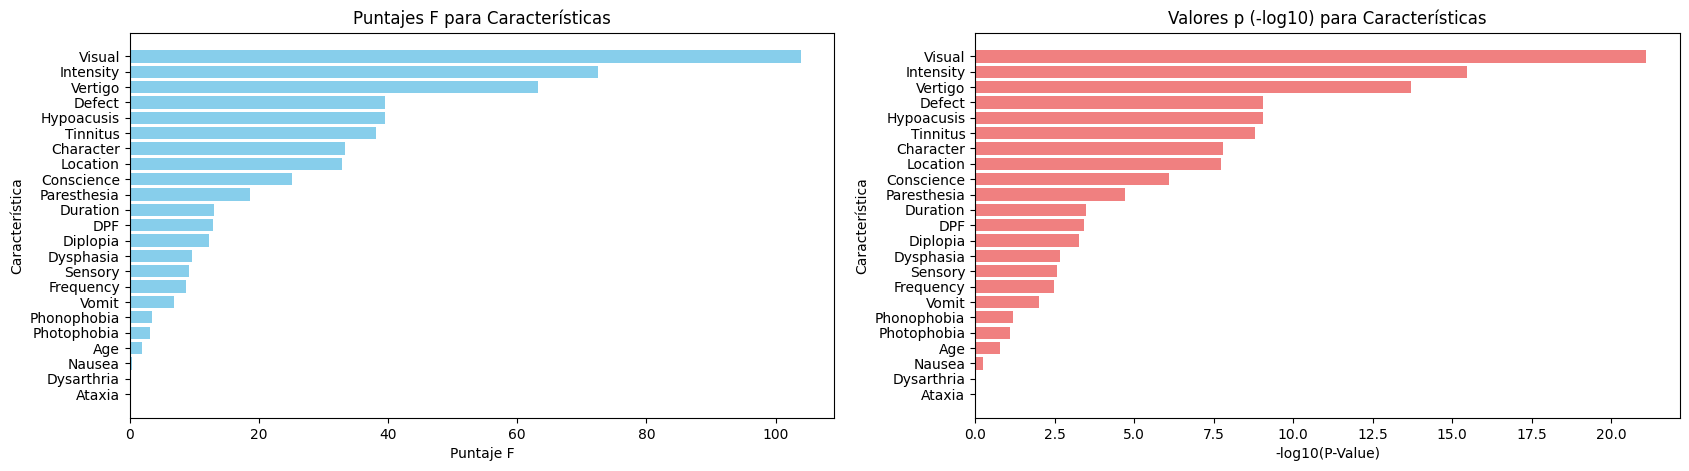

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].barh(feature_scores_df['Feature'], feature_scores_df['F_Score'], color='skyblue')
ax[0].set_xlabel('Puntaje F')
ax[0].set_ylabel('Característica')
ax[0].set_title('Puntajes F para Características')


ax[1].barh(feature_scores_df['Feature'], -np.log10(feature_scores_df['P_Value']), color='lightcoral')
ax[1].set_xlabel('-log10(P-Value)')
ax[1].set_ylabel('Característica')
ax[1].set_title('Valores p (-log10) para Características')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

In [32]:
cols = feature_scores_df[feature_scores_df['F_Score']>=1].Feature.to_list()

**Modeling and Evaluation**

In [33]:
X_M = df[cols]
Y_M = df['Type']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

**Train Test Split**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.25, random_state=42)

**Logistic Regression**

In [35]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.75      0.60      0.67         5
           2       0.93      0.88      0.90        16
           3       1.00      0.83      0.91         6
           4       0.00      0.00      0.00         2
           5       0.88      0.97      0.92        61
           6       1.00      1.00      1.00         4

    accuracy                           0.89       100
   macro avg       0.79      0.71      0.74       100
weighted avg       0.88      0.89      0.88       100

accuracy:  0.89
mean_absolute_error:  0.28
mean_squared_error:  0.92


**Random Forest Classifier**

In [36]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.67      0.40      0.50         5
           2       0.80      1.00      0.89        16
           3       1.00      0.50      0.67         6
           4       0.00      0.00      0.00         2
           5       0.95      0.95      0.95        61
           6       1.00      1.00      1.00         4

    accuracy                           0.89       100
   macro avg       0.74      0.69      0.69       100
weighted avg       0.89      0.89      0.88       100

accuracy:  0.89
mean_absolute_error:  0.27
mean_squared_error:  0.87


**Decision Tree**

In [37]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.00      0.00      0.00         5
           2       0.84      1.00      0.91        16
           3       0.25      0.17      0.20         6
           4       0.20      0.50      0.29         2
           5       0.93      0.87      0.90        61
           6       1.00      1.00      1.00         4

    accuracy                           0.80       100
   macro avg       0.55      0.62      0.57       100
weighted avg       0.80      0.80      0.79       100

accuracy:  0.8
mean_absolute_error:  0.48
mean_squared_error:  1.5


5    74.1
2    18.0
1     7.2
6     6.0
0     5.4
3     5.1
4     4.2
Name: Type, dtype: float64


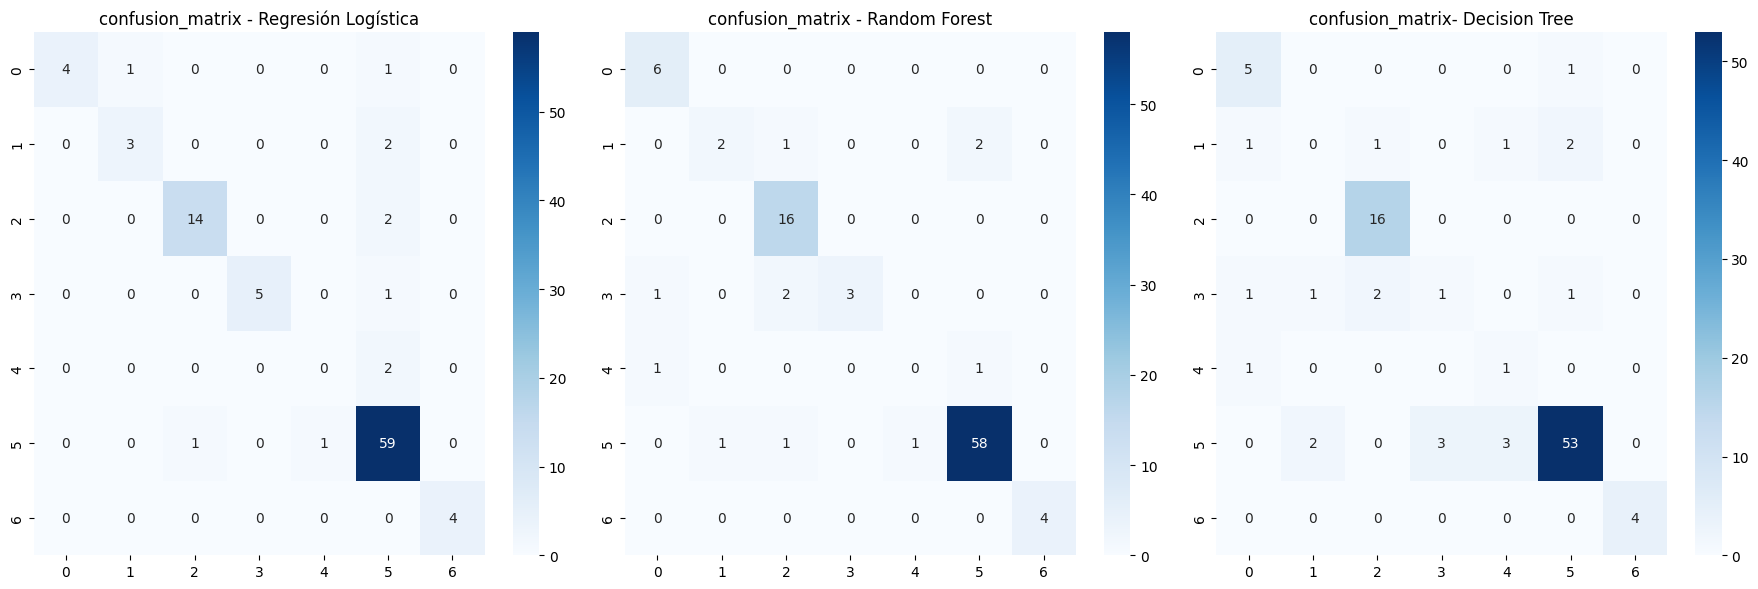

In [ ]:
logistic_conf_matrix = confusion_matrix(y_test, model_pred_L)
random_forest_conf_matrix = confusion_matrix(y_test, model_pred_R)
decision_tree_conf_matrix = confusion_matrix(y_test, model_pred_T)

plt.figure(figsize=(18, 6))

plt.subplot(131)
sns.heatmap(logistic_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix - Regresión Logística')

plt.subplot(132)
sns.heatmap(random_forest_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix - Random Forest')

plt.subplot(133)
sns.heatmap(decision_tree_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix- Decision Tree')

plt.tight_layout()
print(df['Type'].value_counts()*0.3)
plt.show()


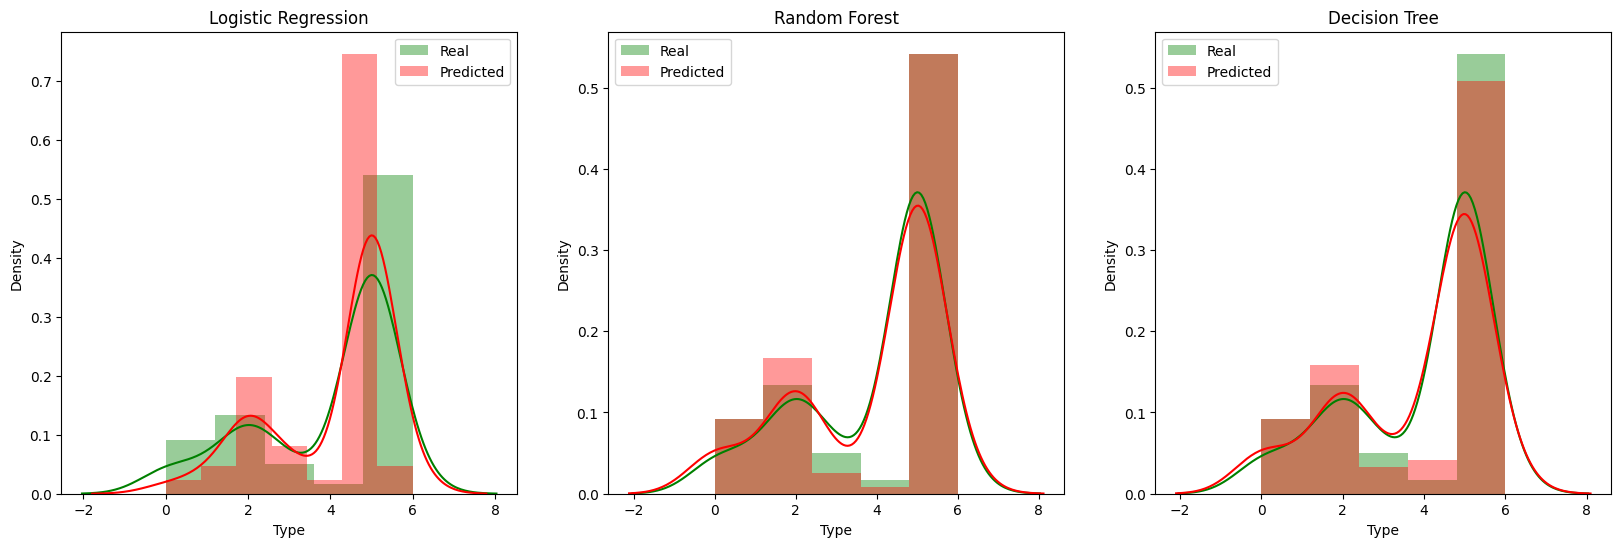

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('Decision Tree')

ax[0].legend()
ax[1].legend()
ax[2].legend()